In [2]:
!pip install pandas_profiling

In [4]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score


df = pd.read_csv('churn_data.csv')

C:\Users\farra\AppData\Local\Temp\ipykernel_24716\1216741805.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
df

CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ...  \
0     33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1      34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2     34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3     34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4     34.039224, -118.266293  34.039224 -118.266293    Male  ...   
...                      ...        ...         ...     ...  ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female  ...   
7039  34.667815, -117.536183  34.667815 -117.536183    Male  ...   
7040  34.559882, -115.637164  34.559882 -115.637164  Female  ...   
7041     34.1678, -116.86433  34.167800 -116.864330  Female  ...   
7042  34.424926, -117.184503  34.424926 -117.184503    Male  ...   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

      Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
0               53.85        108.15         Yes           1          86  3239   
1               70.70        151.65         Yes           1          67  2701   
2               99.65         820.5         Yes           1          86  5372   
3              104.80       3046.05         Yes           1          84  5003   
4              103.70        5036.3         Yes           1          89  5340   
...               ...           ...         ...         ...         ...   ...   
7038            21.15        1419.4          No           0          45  5306   
7039            84.80        1990.5          No           0          59  2140   
7040           103.20        7362.9          No           0          71  5560   
7041            29.60        346.45          No           0          59  2793   
7042           105.65        6844.5          No           0          38  5097   

                       Churn Reason  
0      Competitor made better offer  
1                             Moved  
2                             Moved  
3                             Moved  
4     Competitor had better devices  
...                             ...  
7038                            NaN  
7039                            NaN  
7040                            NaN  
7041                            NaN  
7042                            

In [6]:
# converts total charges from string to float
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)
df['Total Charges'] = df['Total Charges'].astype(float)
#choosing variables apart from latitude, longitude, zip code
df1 = df[['Country', 'State', 'City','Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges', 'Total Charges','Churn Value']]

In [7]:
#one hot encodeing all variables
df_encoded = pd.get_dummies(df1, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'])

In [8]:
df_encoded

Country       State          City  Zip Code   Latitude  \
0     United States  California   Los Angeles     90003  33.964131   
1     United States  California   Los Angeles     90005  34.059281   
2     United States  California   Los Angeles     90006  34.048013   
3     United States  California   Los Angeles     90010  34.062125   
4     United States  California   Los Angeles     90015  34.039224   
...             ...         ...           ...       ...        ...   
7038  United States  California       Landers     92285  34.341737   
7039  United States  California      Adelanto     92301  34.667815   
7040  United States  California         Amboy     92304  34.559882   
7041  United States  California  Angelus Oaks     92305  34.167800   
7042  United States  California  Apple Valley     92308  34.424926   

       Longitude  Tenure Months  Monthly Charges  Total Charges  Churn Value  \
0    -118.272783              2            53.85         108.15            1   
1    -118.307420              2            70.70         151.65            1   
2    -118.293953              8            99.65         820.50            1   
3    -118.315709             28           104.80        3046.05            1   
4    -118.266293             49           103.70        5036.30            1   
...          ...            ...              ...            ...          ...   
7038 -116.539416             72            21.15        1419.40            0   
7039 -117.536183             24            84.80        1990.50            0   
7040 -115.637164             72           103.20        7362.90            0   
7041 -116.864330             11            29.60         346.45            0   
7042 -117.184503             66           105.65        6844.50            0   

      ...  Streaming Movies_Yes  Contract_Month-to-month  Contract_One year  \
0     ...                     0                        1                  0   
1     ...                     0                        1                  0   
2     ...                     1                        1                  0   
3     ...                     1                        1                  0   
4     ...                     1                        1                  0   
...   ...                   ...                      ...                ...   
7038  ...                     0                        0                  0   
7039  ...                     1                        0                  1   
7040  ...                     1                        0                  1   
7041  ...                     0                        1                  0   
7042  ...                     1                        0                  0   

      Contract_Two year  Paperless Billing_No  Paperless Billing_Yes  \
0                     0                     0                      1   
1                     0                     0                      1   
2                     0                     0                      1   
3                     0                     0                      1   
4                     0                     0                      1   
...                 ...                   ...                    ...   
7038                  1                     0                      1   
7039                  0                     0                      1   
7040                  0                     0                      1   
7041                  0                     0                      1   
7042                  1                     0                      1   

      Payment Method_Bank transfer (automatic)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            1   
...                                        ...   
7038                                         1

In [9]:
#Dropping dummy variables
df_encoded = df_encoded.drop(['Multiple Lines_No phone service', 'Online Security_No internet service', 'Online Backup_No internet service','Device Protection_No internet service', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Gender_Female', 'Senior Citizen_No', 'Partner_No', 'Paperless Billing_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Contract_One year', 'Payment Method_Mailed check'], axis = 1)
# Scaling continuous variable
scaler = StandardScaler()
df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges']] = scaler.fit_transform(df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges']])
df_encoded.head()

Country       State         City  Zip Code   Latitude   Longitude  \
0  United States  California  Los Angeles     90003  33.964131 -118.272783   
1  United States  California  Los Angeles     90005  34.059281 -118.307420   
2  United States  California  Los Angeles     90006  34.048013 -118.293953   
3  United States  California  Los Angeles     90010  34.062125 -118.315709   
4  United States  California  Los Angeles     90015  34.039224 -118.266293   

   Tenure Months  Monthly Charges  Total Charges  Churn Value  ...  \
0      -1.236724        -0.362660      -0.959649            1  ...   
1      -1.236724         0.197365      -0.940457            1  ...   
2      -0.992402         1.159546      -0.645369            1  ...   
3      -0.177995         1.330711       0.336516            1  ...   
4       0.677133         1.294151       1.214589            1  ...   

   Device Protection_Yes  Tech Support_Yes  Streaming TV_Yes  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      1                 0                 1   
3                      1                 1                 1   
4                      1                 0                 1   

   Streaming Movies_Yes  Contract_Month-to-month  Contract_Two year  \
0                     0                        1                  0   
1                     0                        1                  0   
2                     1                        1                  0   
3                     1                        1                  0   
4                     1                        1                  0   

   Paperless Billing_Yes  Payment Method_Bank transfer (automatic)  \
0                      1                                         0   
1                      1                                         0   
2                      1                                         0   
3                      1                                         0   
4                      1                                         1   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  
0                                       0                                0  
1                                       0                                1  
2                                       0                                1  
3                                       0                                1  
4                                       0                                0  

[5 rows x 30 columns]


from sklearn.svm import SVR

df_encoded = df_encoded.dropna()
df_encoded

In [10]:
df_la = df_encoded[df_encoded['Zip Code'] == 90012]
df_la.columns

Index(['Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Online Security_Yes',
       'Online Backup_Yes', 'Device Protection_Yes', 'Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Contract_Month-to-month',
       'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check'],
      dtype='object')

In [11]:
import pandas as pd
from math import radians
import math

# Define the central location
central_lat = radians(34.065875)
central_lon = radians(-118.238728)

# Define a function to calculate the Manhattan distance
def manhattan_distance(lat1, lon1, lat2, lon2):
    """Calculate the Manhattan distance between two points."""
    dx = abs(lon2 - lon1) * 6371 * math.cos((lat1 + lat2) / 2)
    dy = abs(lat2 - lat1) * 6371
    return dx + dy

# Apply the function to each row in the DataFrame
df_encoded['manhattan_distance'] = df_encoded.apply(lambda x: manhattan_distance(radians(x['Latitude']), radians(x['Longitude']), central_lat, central_lon), axis=1)

# View the updated DataFrame
df_encoded.head()


Country       State         City  Zip Code   Latitude   Longitude  \
0  United States  California  Los Angeles     90003  33.964131 -118.272783   
1  United States  California  Los Angeles     90005  34.059281 -118.307420   
2  United States  California  Los Angeles     90006  34.048013 -118.293953   
3  United States  California  Los Angeles     90010  34.062125 -118.315709   
4  United States  California  Los Angeles     90015  34.039224 -118.266293   

   Tenure Months  Monthly Charges  Total Charges  Churn Value  ...  \
0      -1.236724        -0.362660      -0.959649            1  ...   
1      -1.236724         0.197365      -0.940457            1  ...   
2      -0.992402         1.159546      -0.645369            1  ...   
3      -0.177995         1.330711       0.336516            1  ...   
4       0.677133         1.294151       1.214589            1  ...   

   Tech Support_Yes  Streaming TV_Yes  Streaming Movies_Yes  \
0                 0                 0                     0   
1                 0                 0                     0   
2                 0                 1                     1   
3                 1                 1                     1   
4                 0                 1                     1   

   Contract_Month-to-month  Contract_Two year  Paperless Billing_Yes  \
0                        1                  0                      1   
1                        1                  0                      1   
2                        1                  0                      1   
3                        1                  0                      1   
4                        1                  0                      1   

   Payment Method_Bank transfer (automatic)  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                       0                                0   
1                                       0                                1   
2                                       0                                1   
3                                       0                                1   
4                                       0                                0   

   manhattan_distance  
0           14.452214  
1            7.060907  
2            7.073653  
3            7.508106  
4            5.502956  

[5 rows x 31 columns]

In [12]:
df_encoded[['manhattan_distance']] = scaler.fit_transform(df_encoded[['manhattan_distance']])

In [13]:
df_encoded.dtypes

Country                                      object
State                                        object
City                                         object
Zip Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure Months                               float64
Monthly Charges                             float64
Total Charges                               float64
Churn Value                                   int64
Gender_Male                                   uint8
Senior Citizen_Yes                            uint8
Partner_Yes                                   uint8
Dependents_Yes                                uint8
Phone Service_Yes                             uint8
Multiple Lines_Yes                            uint8
Internet Service_DSL                          uint8
Internet Service_Fiber optic                  uint8
Online Security_Yes                           uint8
Online Backu

In [14]:
df_features = df_encoded.drop(['Latitude', 'Longitude', 'Zip Code', 'Country', 'State', 'City'], axis=1)

In [15]:
df_features = df_features.dropna()

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

data = df_features

X = data.drop(['Churn Value'], axis=1)
y = data['Churn Value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
# Oversampling the minority class making it 1:1
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [20]:
# # Create a Random Forest classifier object
# rfc = RandomForestClassifier(random_state=42)

# # Define the hyperparameters to be searched over
# param_grid = {'n_estimators': [50, 100, 200], 
#               'max_depth': [5, 10, 15],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['sqrt', 'log2']}

In [21]:
# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# # Train the GridSearchCV object on the training data
# grid_search.fit(X_train, y_train)

# # Retrieve the best hyperparameters found by GridSearchCV
# best_params = grid_search.best_params_

# # Create a new Random Forest classifier object using the best hyperparameters
# rfc_best = RandomForestClassifier(random_state=42, **best_params)

# # Train the classifier on the training data
# rfc_best.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = rfc_best.predict(X_test)

In [22]:
# # Evaluate the performance of the classifier using accuracy and classification report
# accuracy = accuracy_score(y_test, y_pred)
# classification_report = classification_report(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred)

# print("Best hyperparameters: ", best_params)
# print("Accuracy: ", accuracy)
# print("Classification report:\n", classification_report)
# print("ROC-AUC Score: ", roc_auc)


In [23]:
print(best_params)

NameError: name 'best_params' is not defined

In [24]:
best_params = {'max_depth': 15, 
               'max_features': 'sqrt', 
               'min_samples_leaf': 1, 
               'min_samples_split': 2, 
               'n_estimators': 200}


rfc = RandomForestClassifier(**best_params)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [25]:
# Evaluate the performance of the classifier using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Best hyperparameters: ", best_params)
print("Accuracy: ", accuracy)
print("Classification report:\n", classification_report)
print("ROC-AUC Score: ", roc_auc)

Best hyperparameters:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy:  0.7853589196872779
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1012
           1       0.61      0.67      0.64       395

    accuracy                           0.79      1407
   macro avg       0.74      0.75      0.74      1407
weighted avg       0.79      0.79      0.79      1407

ROC-AUC Score:  0.7512345524590984


In [26]:
pp.ProfileReport(df_encoded)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
def evaluate_model(name, train_preds, test_preds):
    print(f"Evaluation of {name} model:")
    print("Training set:")
    print("F1 Score (Per Class):", f1_score(y_train, np.round(train_preds), average=None))
    print("AUC Score:", roc_auc_score(y_train, train_preds))
    
    cm_train = confusion_matrix(y_train, np.round(train_preds))
    cm_train_percent = cm_train / cm_train.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_train_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"Confusion matrix ({name} model) - Training set (Percentages)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("Test set:")
    print("F1 Score (Per Class):", f1_score(y_test, np.round(test_preds), average=None))
    print("AUC Score:", roc_auc_score(y_test, test_preds))
    
    cm_test = confusion_matrix(y_test, np.round(test_preds))
    cm_test_percent = cm_test / cm_test.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_test_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"Confusion matrix ({name} model) - Test set (Percentages)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Evaluation of Catboost model:
Training set:
F1 Score (Per Class): [0.9787234 0.9795822]
AUC Score: 0.9791616477957118


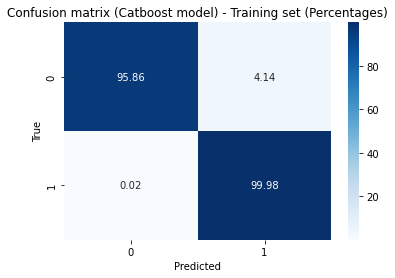

Test set:
F1 Score (Per Class): [0.84747475 0.63788969]
AUC Score: 0.7512345524590984


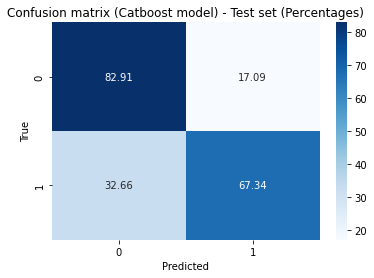

In [29]:
# Predict the target variable on the test set
y_pred = rfc.predict(X_test)


# Predict the target variable on the train set
y_pred_train = rfc.predict(X_train)

evaluate_model("Catboost", y_pred_train, y_pred)